# Lab 0: Xarray and Zarr Fundamentals

**Goal: Get familiar with the core tools**

This introductory lab covers the fundamentals of working with Xarray and Zarr - the foundational technologies that power the Earthmover platform. You'll learn how to:

- Work with multidimensional arrays using Xarray
- Understand the Zarr storage format and its benefits for cloud-native data
- Perform basic data operations, indexing, and visualization
- Understand how these tools enable fast, scalable analysis of geospatial data
- This foundation will prepare you for the more advanced workflows in the subsequent labs.

Note that this notebook re-uses a selection of content from the official [Xarray Tutorial Website](https://tutorial.xarray.dev/intro.html), particularly sections from
- [Xarray in 45 minutes](https://tutorial.xarray.dev/overview/xarray-in-45-min.html)
- [Introduction to Zarr](https://tutorial.xarray.dev/intermediate/intro-to-zarr.html)

<img src="https://docs.xarray.dev/en/stable/_static/Xarray_Logo_RGB_Final.svg" align="right" width="30%">

# Xarray fundamentals

In this section, we cover the basics of Xarray data structures. By the
end of the section, we will be able to:

- Understand the basic data structures in Xarray
- Inspect `DataArray` and `Dataset` objects.
- Read and write netCDF files using Xarray.
- Understand that there are many packages that build on top of xarray


We'll start by reviewing the various components of the Xarray data model, represented here visually:

<img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png" align="center" width="50%">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Exception reporting mode: Minimal


Xarray has a few small real-world tutorial datasets hosted in the [xarray-data](https://github.com/pydata/xarray-data) GitHub repository.

[`xarray.tutorial.load_dataset()`](https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html#xarray.tutorial.open_dataset) is a convenience function to download and open DataSets by name (listed at that link).

Here we'll use `air_temperature` from the [National Center for Environmental Prediction](https://www.weather.gov/ncep/). Xarray objects have convenient HTML representations to give an overview of what we're working with:

In [2]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

/Users/tom/Documents/Work/Code/earthsciencesnz-immersion-day/.venv/lib/python3.13/site-packages/pvxarray/_version.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Note that behind the scenes the `tutorial.open_dataset` downloads a file. It then uses [`xarray.open_dataset`](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html#xarray-open-dataset) function to open that file (which for this datasets is a [netCDF](https://www.unidata.ucar.edu/software/netcdf/) file). 

A few things are done automatically upon opening, but controlled by keyword arguments. For example, try passing the keyword argument `mask_and_scale=False`... what happens?

## What's in a Dataset? 

*Many DataArrays!* 

Datasets are dictionary-like containers of "DataArray"s. They are a mapping of
variable name to DataArray:

In [3]:
# pull out "air" dataarray with dictionary syntax
ds["air"]

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

You can save some typing by using the "attribute" or "dot" notation. This won't
work for variable names that clash with a built-in method name (like `mean` for
example).


In [4]:
# pull out dataarray using dot notation
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## What's in a DataArray? 

*data + (a lot of) metadata*

### Name (optional)

In [5]:
da = ds.air

da.name

'air'

### Named dimensions 

`.dims` correspond to the axes of your data. 

In this case we have 2 spatial dimensions (`latitude` and `longitude` are stored with shorthand names `lat` and `lon`) and one temporal dimension (`time`).

In [6]:
da.dims

('time', 'lat', 'lon')

### Coordinate variables 

`.coords` is a simple [data container](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#coordinates)
for coordinate variables.

Here we see the actual timestamps and spatial positions of our air temperature data:

In [7]:
da.coords

Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

Coordinates objects support similar indexing notation


In [8]:
# extracting coordinate variables
da.lon

<xarray.DataArray 'lon' (lon: 53)> Size: 212B
200.0 202.5 205.0 207.5 210.0 212.5 ... 317.5 320.0 322.5 325.0 327.5 330.0
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [9]:
# extracting coordinate variables from .coords
da.coords["lon"]

<xarray.DataArray 'lon' (lon: 53)> Size: 212B
200.0 202.5 205.0 207.5 210.0 212.5 ... 317.5 320.0 322.5 325.0 327.5 330.0
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

It is useful to think of the values in these coordinate variables as axis
"labels" such as "tick labels" in a figure. These are coordinate locations on a
grid at which you have data.


### Arbitrary attributes 

`.attrs` is a dictionary that can contain arbitrary Python objects (strings, lists, integers, dictionaries, etc.) Your only
limitation is that some attributes may not be writeable to certain file formats.

In [10]:
da.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': np.int16(2),
 'GRIB_id': np.int16(11),
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [11]:
# assign your own attributes!
da.attrs["who_is_awesome"] = "xarray"
da.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': np.int16(2),
 'GRIB_id': np.int16(11),
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'who_is_awesome': 'xarray'}

In [12]:
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

### Underlying data 

`.data` contains the [numpy array](https://numpy.org) storing air temperature values.

<img src="https://raw.githubusercontent.com/numpy/numpy/623bc1fae1d47df24e7f1e29321d0c0ba2771ce0/branding/logo/primary/numpylogo.svg" width="25%">

Xarray structures wrap underlying simpler array-like data structures. This part of Xarray is quite extensible allowing for distributed array, GPU arrays, sparse arrays, arrays with units etc. We'll  briefly look at this later in this tutorial.

In [13]:
da.data

array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[245.79, 244.79, ..., 243.99, 244.79],
        [249.89, 249.29, ..., 242.49, 244.29],
        ...,
        [296.29, 297.19, ..., 295.09, 294.39],
        [297.79, 298.39, ..., 295.49, 295.19]],

       [[245.09, 244.29, ..., 241.49, 241.79],
        [249.89, 249.29, ..., 240.29, 241.69],
        ...,
        [296.09, 296.89, ..., 295.69, 295.19],
        [297.69, 298.09, ..., 296.19, 295.69]]], shape=(2920, 25, 53))

In [14]:
# what is the type of the underlying data
type(da.data)

numpy.ndarray

### Review

Xarray provides two main data structures:

1. [`DataArrays`](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray) that wrap underlying data containers (e.g. numpy arrays) and contain associated metadata
1. [`Datasets`](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset) that are dictionary-like containers of DataArrays

DataArrays contain underlying arrays and associated metadata:
1. Name
2. Dimension names
3. Coordinate variables
4. and arbitrary attributes.

---

## Why Xarray? 

Metadata provides context and provides code that is more legible. This reduces the likelihood of errors from typos and makes analysis more intuitive and fun!

### Analysis without xarray: `X(`

In [15]:
# plot the first timestep
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array

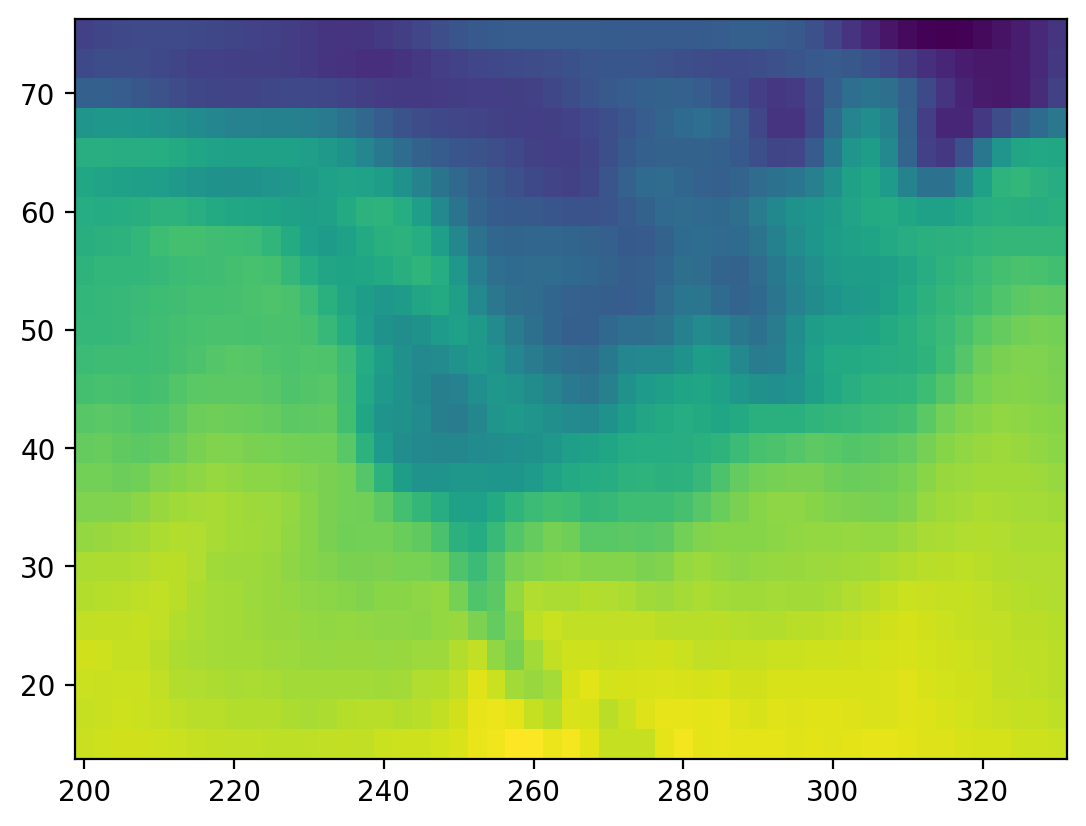

In [16]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

In [17]:
temp.mean(axis=1)  ## what did I just do? I can't tell by looking at this line.

array([[279.398 , 279.6664, ..., 280.3152, 280.6624],
       [279.0572, 279.538 , ..., 280.27  , 280.7976],
       ...,
       [279.398 , 279.666 , ..., 280.342 , 280.834 ],
       [279.27  , 279.354 , ..., 279.97  , 280.482 ]], shape=(2920, 53))

### Analysis with xarray `=)`

How readable is this code?


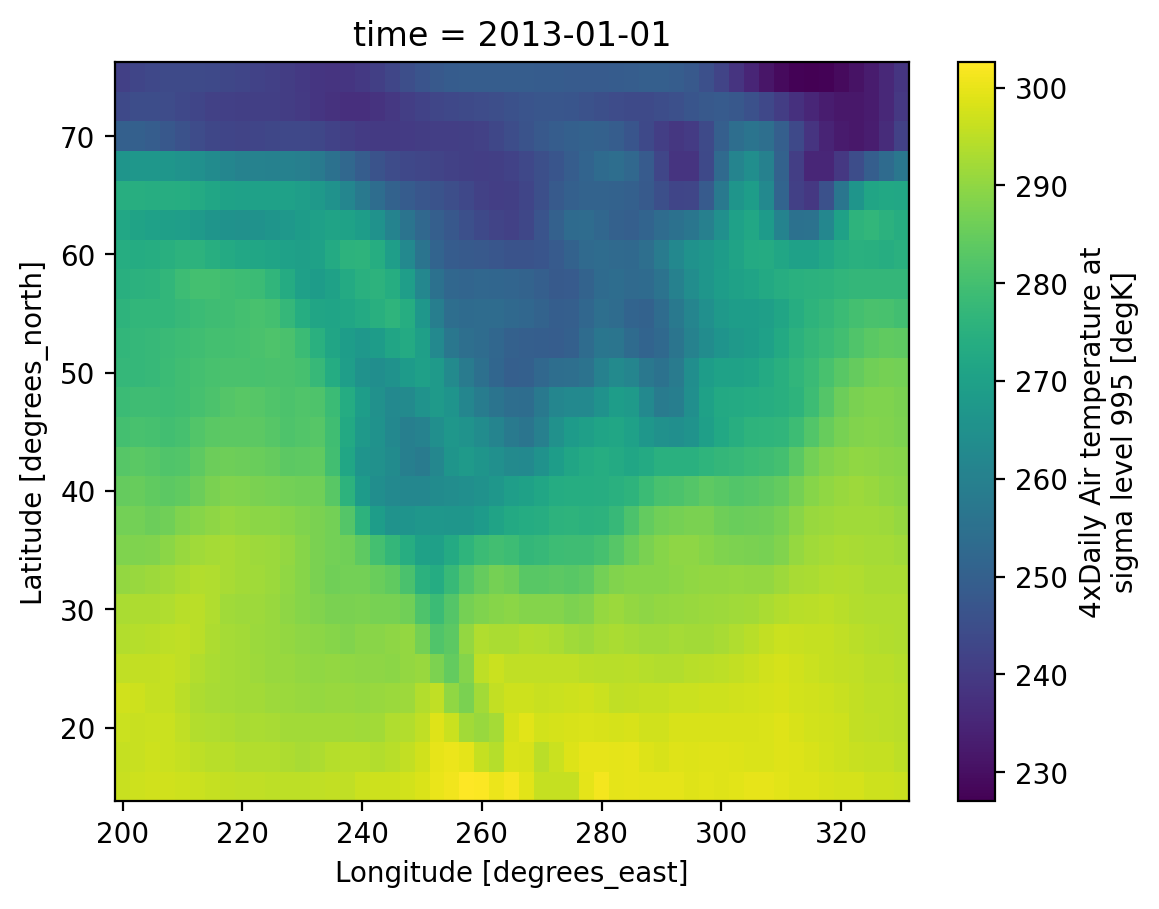

In [18]:
ds.air.isel(time=0).plot(x="lon");

Use dimension names instead of axis numbers


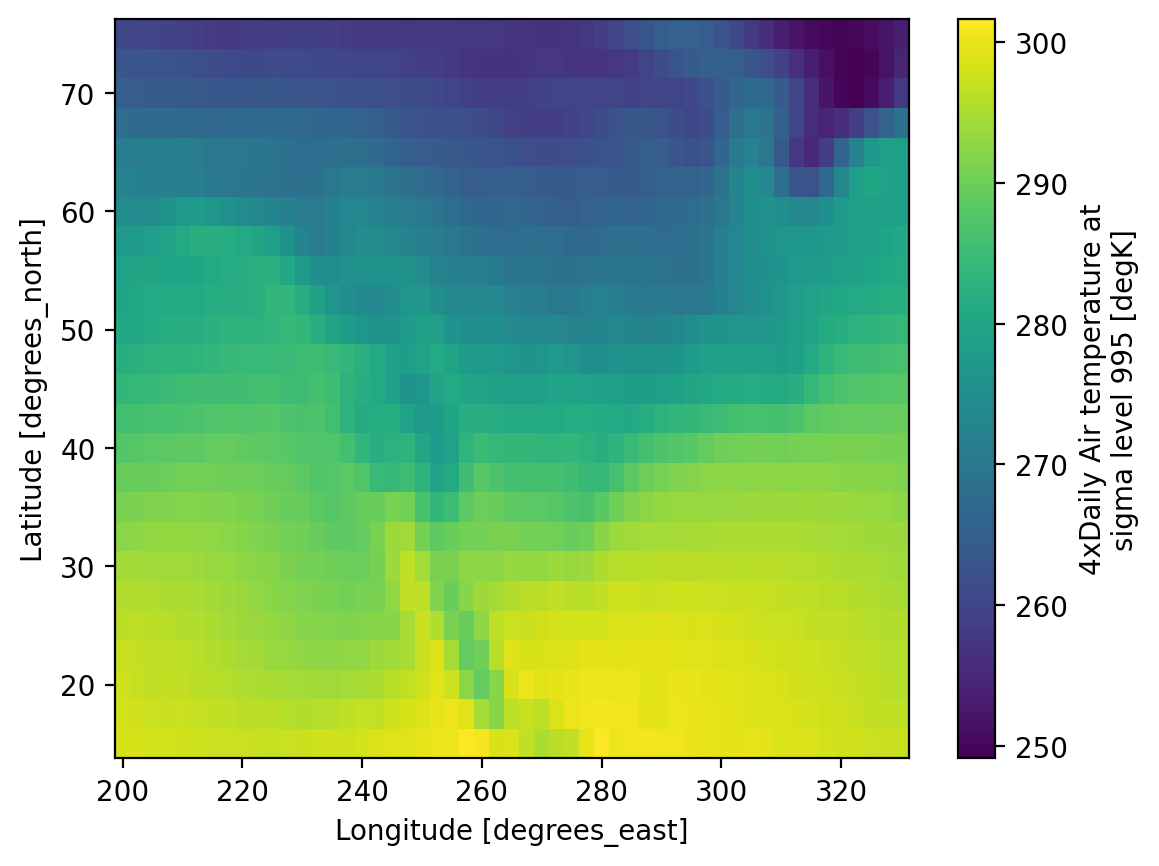

In [19]:
ds.air.mean(dim="time").plot(x="lon")

---

## Extracting data or "indexing" 

Xarray supports

- label-based indexing using `.sel`
- position-based indexing using `.isel`

See the [user guide](https://docs.xarray.dev/en/stable/indexing.html) for more.

### Label-based indexing

Xarray inherits its label-based indexing rules from pandas; this means great
support for dates and times!


In [20]:
# here's what ds looks like
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [21]:
# pull out data for all of 2013-May
ds.sel(time="2013-05")

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 124, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 1MB 259.2 259.3 259.1 ... 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [22]:
# demonstrate slicing
ds.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset> Size: 4MB
Dimensions:  (time: 368, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 3kB 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 4MB 259.2 259.3 259.1 ... 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [23]:
ds.sel(time="2013")

<xarray.Dataset> Size: 15MB
Dimensions:  (time: 1460, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 12kB 2013-01-01 ... 2013-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 15MB 241.2 242.5 243.5 ... 295.1 294.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [24]:
# demonstrate "nearest" indexing
ds.sel(lon=240.2, method="nearest")

<xarray.Dataset> Size: 607kB
Dimensions:  (time: 2920, lat: 25)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
    lon      float32 4B 240.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float64 584kB 239.6 237.2 240.1 ... 294.8 296.9 298.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [25]:
# "nearest indexing at multiple points"
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset> Size: 117kB
Dimensions:  (time: 2920, lat: 2, lon: 2)
Coordinates:
  * lat      (lat) float32 8B 40.0 50.0
  * lon      (lon) float32 8B 240.0 235.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 93kB 268.1 283.0 265.5 ... 256.8 268.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Position-based indexing

This is similar to your usual numpy `array[0, 2, 3]` but with the power of named
dimensions!


In [26]:
ds.air.data[0, 2, 3]

np.float64(247.5)

In [27]:
# pull out time index 0, lat index 2, and lon index 3
ds.air.isel(time=0, lat=2, lon=3)  #  much better than ds.air[0, 2, 3]

<xarray.DataArray 'air' ()> Size: 8B
247.5
Coordinates:
    lat      float32 4B 70.0
    lon      float32 4B 207.5
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [28]:
# demonstrate slicing
ds.air.isel(lat=slice(10))

<xarray.DataArray 'air' (time: 2920, lat: 10, lon: 53)> Size: 12MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 273.4 273.8 273.5 273.8 275.0 276.2
Coordinates:
  * lat      (lat) float32 40B 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

---

## Concepts for computation

Consider calculating the *mean air temperature per unit surface area* for this dataset. Because latitude and longitude correspond to spherical coordinates for Earth's surface, each 2.5x2.5 degree grid cell actually has a different surface area as you move away from the equator! This is because *latitudinal length* is fixed ($ \delta Lat = R \delta \phi  $), but *longitudinal length varies with latitude* ($ \delta Lon = R \delta \lambda \cos(\phi) $)

So the [area element for lat-lon coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system#Integration_and_differentiation_in_spherical_coordinates) is


$$ \delta A = R^2 \delta\phi \, \delta\lambda \cos(\phi) $$

where $\phi$ is latitude, $\delta \phi$ is the spacing of the points in latitude, $\delta \lambda$ is the spacing of the points in longitude, and $R$ is Earth's radius. (In this formula, $\phi$ and $\lambda$ are measured in radians)

In [29]:
# Earth's average radius in meters
R = 6.371e6

# Coordinate spacing for this dataset is 2.5 x 2.5 degrees
dϕ = np.deg2rad(2.5)
dλ = np.deg2rad(2.5)

dlat = R * dϕ * xr.ones_like(ds.air.lon)
dlon = R * dλ * np.cos(np.deg2rad(ds.air.lat))
dlon.name = "dlon"
dlat.name = "dlat"

There are two concepts here:
1. you can call functions like `np.cos` and `np.deg2rad` (["numpy ufuncs"](https://numpy.org/doc/stable/reference/ufuncs.html)) on Xarray objects and receive an Xarray object back.
2. We used [ones_like](https://docs.xarray.dev/en/stable/generated/xarray.ones_like.html) to create a DataArray that looks like `ds.air.lon` in all respects, except that the data are all ones

In [30]:
# returns an xarray DataArray!
np.cos(np.deg2rad(ds.lat))

<xarray.DataArray 'lat' (lat: 25)> Size: 100B
0.2588 0.3007 0.342 0.3827 0.4226 0.4617 ... 0.9063 0.9239 0.9397 0.9537 0.9659
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [31]:
# cell latitude length is constant with longitude
dlat

<xarray.DataArray 'dlat' (lon: 53)> Size: 424B
2.78e+05 2.78e+05 2.78e+05 2.78e+05 ... 2.78e+05 2.78e+05 2.78e+05 2.78e+05
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [32]:
# cell longitude length changes with latitude
dlon

<xarray.DataArray 'dlon' (lat: 25)> Size: 200B
7.195e+04 8.359e+04 9.508e+04 1.064e+05 ... 2.612e+05 2.651e+05 2.685e+05
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

### Broadcasting: expanding data

Our longitude and latitude length DataArrays are both 1D with different dimension names. If we multiply these DataArrays together the dimensionality is expanded to 2D by _broadcasting_:

In [33]:
cell_area = dlon * dlat
cell_area

<xarray.DataArray (lat: 25, lon: 53)> Size: 11kB
2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

The result has two dimensions because xarray realizes that dimensions `lon` and
`lat` are different so it automatically "broadcasts" to get a 2D result. See the
last row in this image from _Jake VanderPlas Python Data Science Handbook_

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" align="center">

Because xarray knows about dimension names we avoid having to create unnecessary
size-1 dimensions using `np.newaxis` or `.reshape`. For more, see the [user guide](https://docs.xarray.dev/en/stable/user-guide/computation.html#broadcasting-by-dimension-name)


---

### Alignment: putting data on the same grid

When doing arithmetic operations xarray automatically "aligns" i.e. puts the
data on the same grid. In this case `cell_area` and `ds.air` are at the same
lat, lon points we end up with a result with the same shape (25x53):


In [34]:
ds.air.isel(time=1) / cell_area

<xarray.DataArray (lat: 25, lon: 53)> Size: 11kB
1.21e-08 1.213e-08 1.215e-08 1.217e-08 ... 3.971e-09 3.971e-09 3.974e-09
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01T06:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

Now lets make `cell_area` unaligned i.e. change the coordinate labels


In [35]:
# make a copy of cell_area
# then add 1e-5 degrees to latitude
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["lat"] = cell_area.lat + 1e-5  # latitudes are off by 1e-5 degrees!
cell_area_bad

<xarray.DataArray (lat: 25, lon: 53)> Size: 11kB
2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [36]:
cell_area_bad * ds.air.isel(time=1)

<xarray.DataArray (lat: 0, lon: 53)> Size: 0B

Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * lat      (lat) float32 0B 
    time     datetime64[ns] 8B 2013-01-01T06:00:00
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

The result is an empty array with no latitude coordinates because none of them were aligned!

**Tip**: If you notice extra NaNs or missing points after xarray computation, it
means that your xarray coordinates were not aligned _exactly_.

To make sure variables are aligned as you think they are, do the following:

In [37]:
xr.align(cell_area_bad, ds.air, join="exact")

AlignmentError: cannot align objects with join='exact' where index/labels/sizes are not equal along these coordinates (dimensions): 'lat' ('lat',)

The above statement raises an error since the two are not aligned.

For more, see
[the Xarray documentation](https://docs.xarray.dev/en/stable/user-guide/computation.html#automatic-alignment). [This tutorial notebook](https://tutorial.xarray.dev/fundamentals/02.3_aligning_data_objects.html) also covers alignment and broadcasting (*highly recommended*)

---

## High level computation 

(`groupby`, `resample`, `rolling`, `coarsen`, `weighted`)

Xarray has some very useful high level objects that let you do common
computations:

1. `groupby` :
   [Bin data in to groups and reduce](https://docs.xarray.dev/en/stable/groupby.html)
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://docs.xarray.dev/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://docs.xarray.dev/en/stable/user-guide/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://docs.xarray.dev/en/stable/user-guide/computation.html#coarsen-large-arrays)
1. `weighted` :
   [Weight your data before reducing](https://docs.xarray.dev/en/stable/user-guide/computation.html#weighted-array-reductions)


Below we quickly demonstrate these patterns. See the user guide links above and [the tutorial](https://tutorial.xarray.dev/intermediate/01-high-level-computation-patterns.html) for more.

### groupby


In [38]:
# here's ds
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [39]:
# seasonal groups
ds.groupby("time.season")

<DatasetGroupBy, grouped over 1 grouper(s), 4 groups in total:
    'season': UniqueGrouper('season'), 4/4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'>

In [40]:
# make a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset> Size: 43kB
Dimensions:  (season: 4, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float64 42kB 247.0 247.0 246.7 ... 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

The seasons are out of order (they are alphabetically sorted). This is a common
annoyance. The solution is to use `.sel` to change the order of labels


In [41]:
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset> Size: 43kB
Dimensions:  (season: 4, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * season   (season) object 32B 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    air      (season, lat, lon) float64 42kB 247.0 247.0 246.7 ... 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

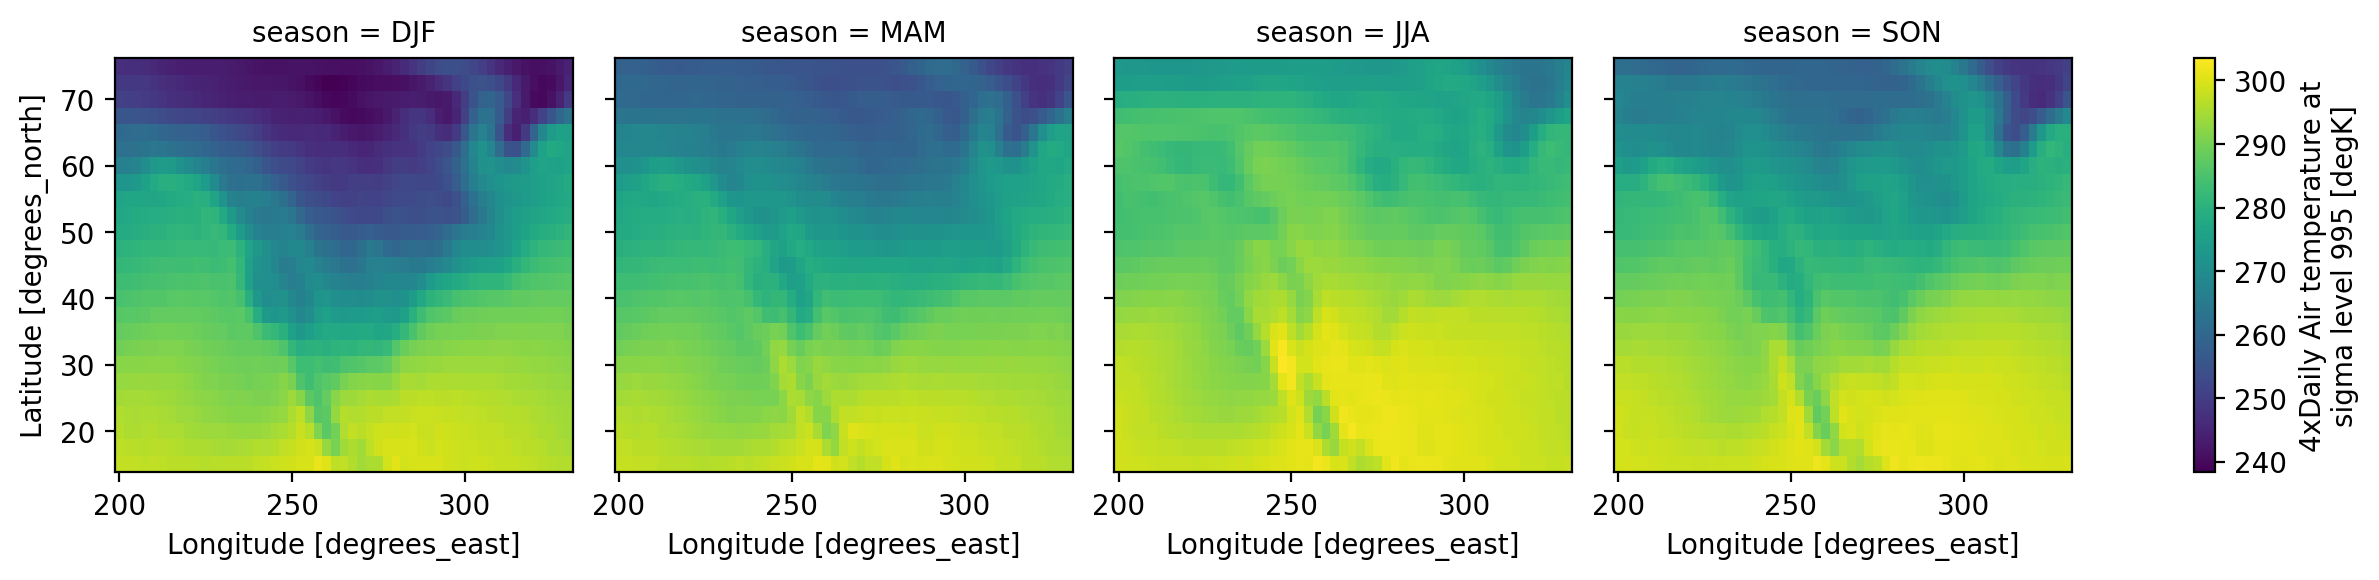

In [42]:
seasonal_mean.air.plot(col="season")

### resample


In [43]:
# resample to monthly frequency
ds.resample(time="ME").mean()

<xarray.Dataset> Size: 255kB
Dimensions:  (time: 24, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 192B 2013-01-31 2013-02-28 ... 2014-12-31
Data variables:
    air      (time, lat, lon) float64 254kB 244.5 244.7 244.7 ... 297.7 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### weighted


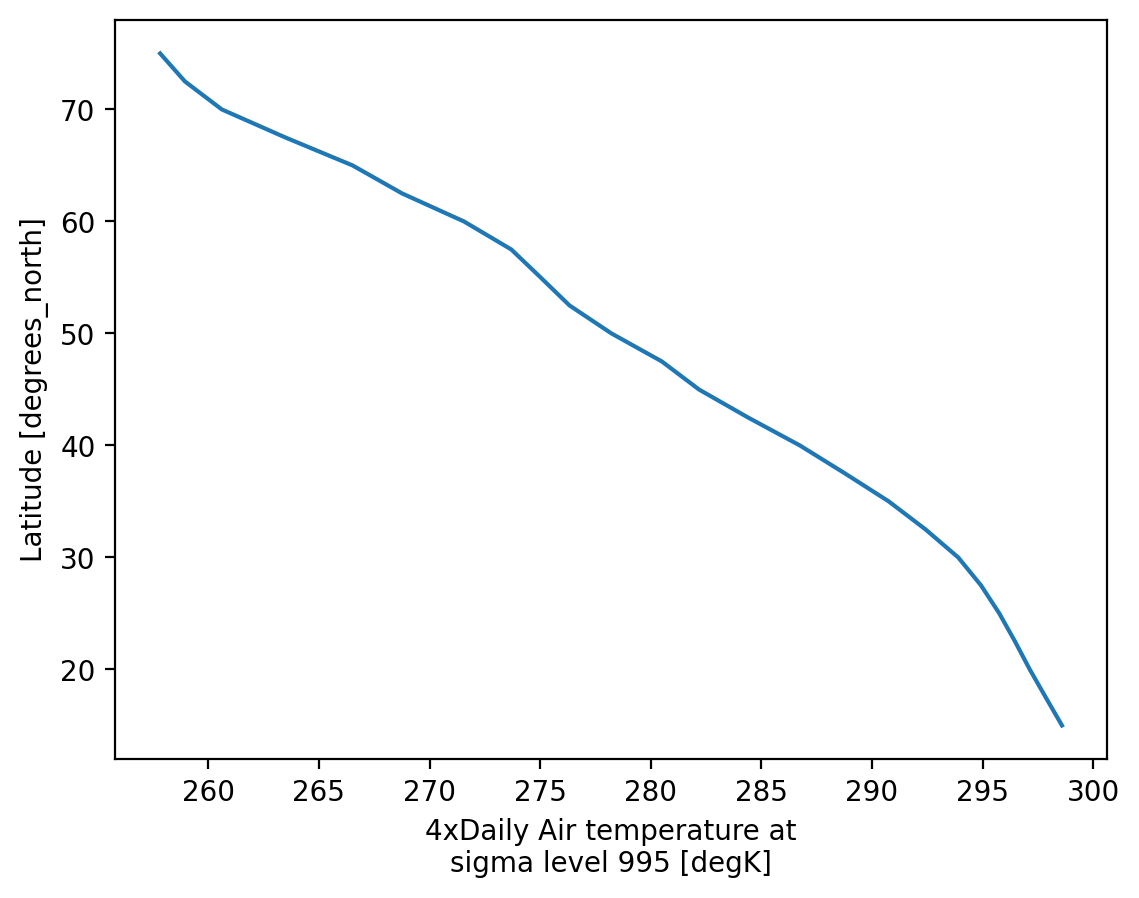

In [44]:
# weight by cell_area and take mean over (time, lon)
ds.weighted(cell_area).mean(["lon", "time"]).air.plot(y="lat");

---

## Visualization

(`.plot`)


We have seen very simple plots earlier. Xarray also lets you easily visualize
3D and 4D datasets by presenting multiple facets (or panels or subplots) showing
variations across rows and/or columns.

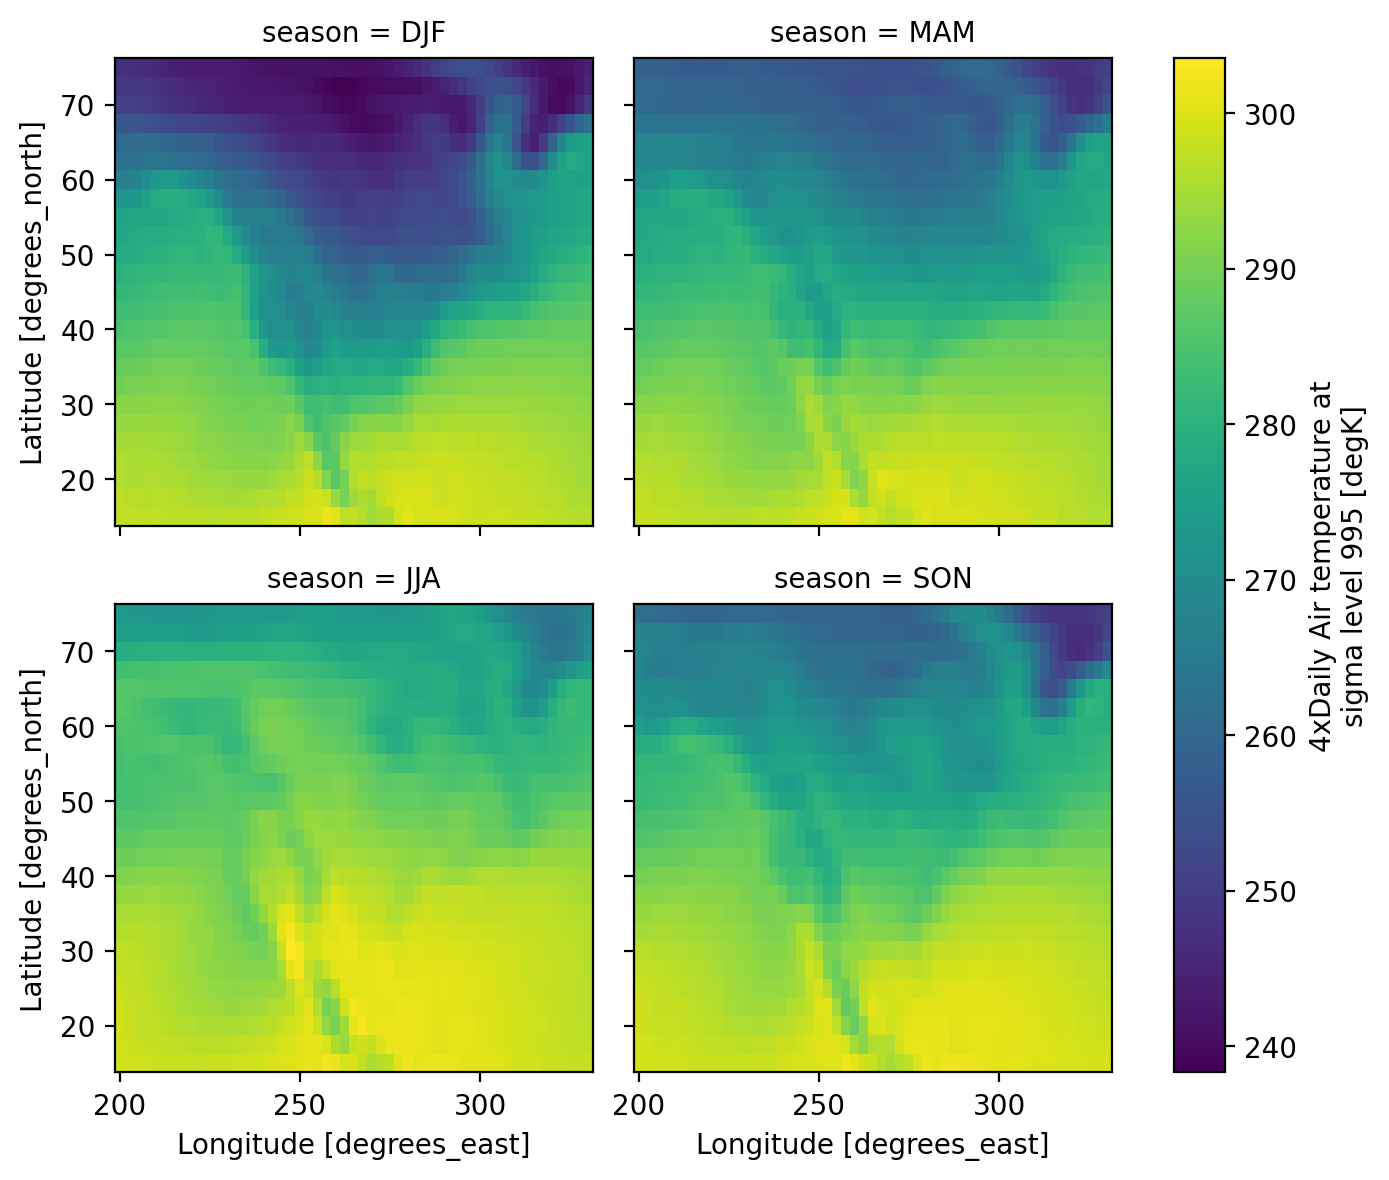

In [45]:
# facet the seasonal_mean
seasonal_mean.air.plot(col="season", col_wrap=2);

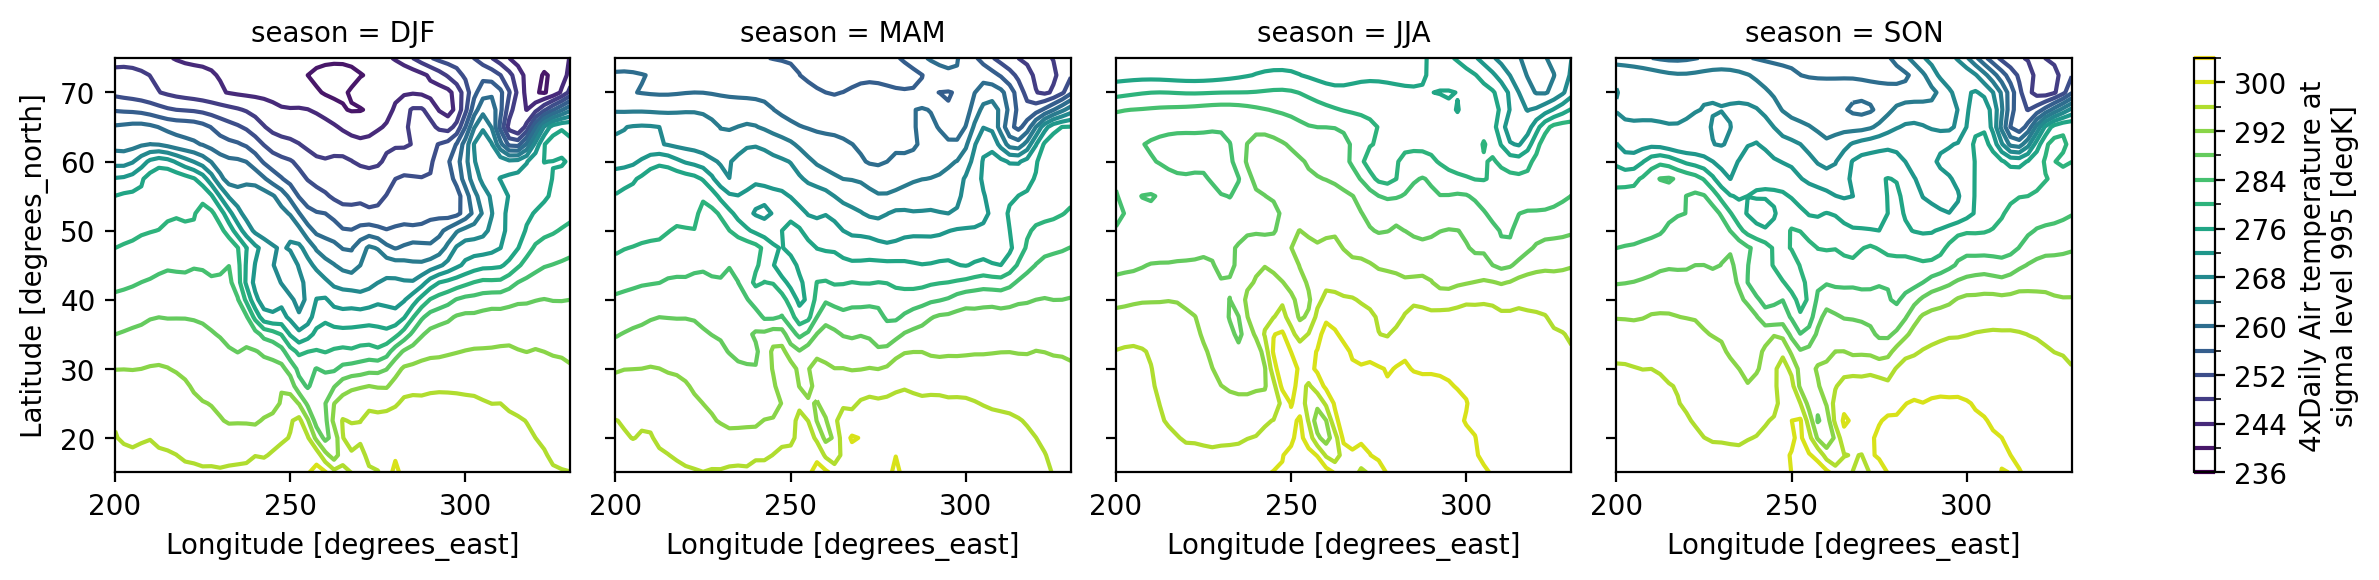

In [46]:
# contours
seasonal_mean.air.plot.contour(col="season", levels=20, add_colorbar=True);

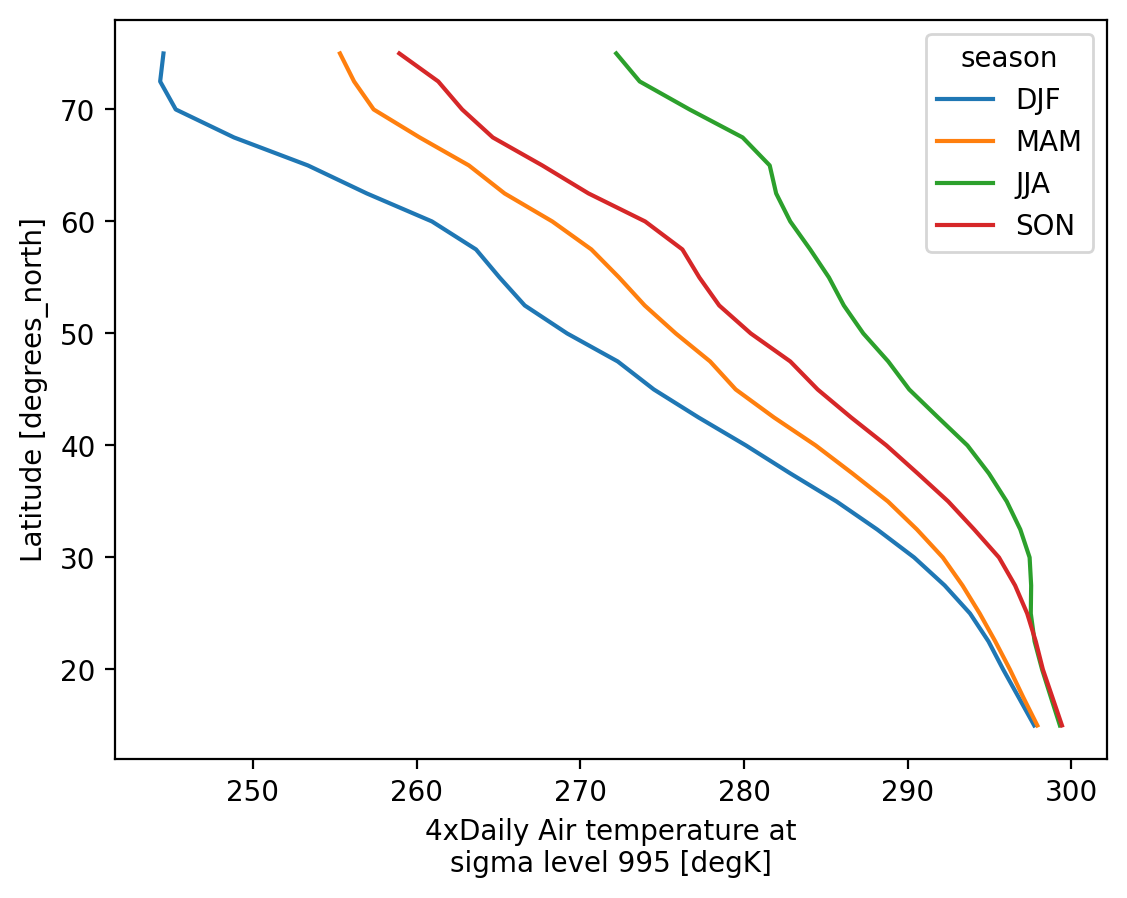

In [47]:
# line plots too? wut
seasonal_mean.air.mean("lon").plot.line(hue="season", y="lat");

For more see the [user guide](https://docs.xarray.dev/en/stable/plotting.html), the [gallery](https://docs.xarray.dev/en/stable/examples/visualization_gallery.html), and [the tutorial material](https://tutorial.xarray.dev/fundamentals/04.0_plotting.html).

---

## Reading and writing files

Xarray supports many disk formats. Below is a small example using netCDF. For
more see the [documentation](https://docs.xarray.dev/en/stable/user-guide/io.html)


In [48]:
# write to netCDF
ds.to_netcdf("my-example-dataset.nc")

/Users/tom/Documents/Work/Code/earthsciencesnz-immersion-day/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3699: SerializationWarning: saving variable air with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)


**Note:** To avoid the `SerializationWarning` you can assign a _FillValue for any NaNs in 'air' array by adding the keyword argument `encoding=dict(air=dict(_FillValue=-9999))`

In [49]:
# read from disk
fromdisk = xr.open_dataset("my-example-dataset.nc")
fromdisk

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [50]:
# check that the two are identical
ds.identical(fromdisk)

True

**Tip:** A common use case to read datasets that are a collection of many netCDF
files. See the [documentation](https://docs.xarray.dev/en/stable/user-guide/io.html#reading-multi-file-datasets) for how
to handle that.

Finally to read other file formats, you might find yourself reading in the data using a different library and then creating a DataArray([docs](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#creating-a-dataarray), [tutorial](https://tutorial.xarray.dev/fundamentals/01.1_creating_data_structures.html)) from scratch. For example, you might use `h5py` to open an HDF5 file and then create a Dataset from that.
For MATLAB files you might use `scipy.io.loadmat` or `h5py` depending on the version of MATLAB file you're opening and then construct a Dataset.

---

## The scientific python ecosystem

Xarray ties in to the larger scientific python ecosystem and in turn many
packages build on top of xarray. A long list of such packages is here:
<https://docs.xarray.dev/en/stable/user-guide/ecosystem.html>.


## Next

1. Read the [tutorial](https://tutorial.xarray.dev) material and [user guide](https://docs.xarray.dev/en/stable/user-guide/index.html)
1. See the description of [common terms](https://docs.xarray.dev/en/stable/terminology.html) used in the xarray documentation: 
1. Answers to common questions on "how to do X" with Xarray are [here](https://docs.xarray.dev/en/stable/get-help/howdoi.html)
1. Ryan Abernathey has a book on data analysis with a [chapter on Xarray](https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html)
1. [Project Pythia](https://projectpythia.org/) has [foundational](https://foundations.projectpythia.org) and more [advanced](https://cookbooks.projectpythia.org/) material on Xarray. Pythia also aggregates other [Python learning resources](https://projectpythia.org/resource-gallery).
1. The [Xarray Github Discussions](https://github.com/pydata/xarray/discussions) and [Pangeo Discourse](https://discourse.pangeo.io/) are good places to ask questions.
1. Tell your friends! Tweet!

# Introduction to Zarr

## Learning Objectives:

- Understand the principles of the Zarr data format
- Learn how to read and write Zarr stores using the `zarr-python` library
- Explore how to use Zarr stores with `xarray` for data analysis and visualization

This section provides a brief introduction to Zarr and how to
use it in cloud environments for scalable, chunked, and compressed data storage.

Zarr is a data format with implementations in different languages. In this tutorial, we will look at an example of how to use the Zarr format by looking at some features of the `zarr-python` library and how Zarr files can be opened with `xarray`.

## What is Zarr?

The Zarr data format is an open, community-maintained format designed for efficient, scalable storage of large N-dimensional arrays. It stores data as compressed and chunked arrays in a format well-suited to parallel processing and cloud-native workflows. 

### Zarr Data Organization:
- **Arrays**: N-dimensional arrays that can be chunked and compressed.
- **Groups**: A container for organizing multiple arrays and other groups with a hierarchical structure.
- **Metadata**: JSON-like metadata describing the arrays and groups, including information about data types, dimensions, chunking, compression, and user-defined key-value fields. 
- **Dimensions and Shape**: Arrays can have any number of dimensions, and their shape is defined by the number of elements in each dimension.
- **Coordinates & Indexing**: Zarr supports coordinate arrays for each dimension, allowing for efficient indexing and slicing.

The diagram below from [the Zarr v3 specification](https://wiki.earthdata.nasa.gov/display/ESO/Zarr+Format) showing the structure of a Zarr store:

![ZarrSpec](https://zarr-specs.readthedocs.io/en/latest/_images/terminology-hierarchy.excalidraw.png)


NetCDF and Zarr share similar terminology and functionality, but the key difference is that NetCDF is a single file, while Zarr is a directory-based “store” composed of many chunked files, making it better suited for distributed and cloud-based workflows.

### Zarr Fundamenals
A Zarr array has the following important properties:
- **Shape**: The dimensions of the array.
- **Dtype**: The data type of each element (e.g., float32).
- **Attributes**: Metadata stored as key-value pairs (e.g., units, description.
- **Compressors**: Algorithms used to compress each chunk (e.g., Zstd, Blosc, Zlib).


#### Example: Creating and Inspecting a Zarr Array

Here we create a simple 2D array of shape `(40, 50)` with chunks of size `(10, 10)` ,write to the `LocalStore` in the `test.zarr` directory. 


In [51]:
import zarr
import pathlib
import shutil

# Ensure we start with a clean directory for the tutorial
datadir = pathlib.Path('../data/zarr-tutorial')
if datadir.exists():
    shutil.rmtree(datadir)

output = datadir / 'test.zarr'
z = zarr.create_array(shape=(40, 50), chunks=(10, 10), dtype='f8', store=output)
z

<Array file://../data/zarr-tutorial/test.zarr shape=(40, 50) dtype=float64>

`.info` provides a summary of the array's properties, including shape, data type, and compression settings.


In [52]:
z.info

Type               : Array
Zarr format        : 3
Data type          : Float64(endianness='little')
Fill value         : 0.0
Shape              : (40, 50)
Chunk shape        : (10, 10)
Order              : C
Read-only          : False
Store type         : LocalStore
Filters            : ()
Serializer         : BytesCodec(endian=<Endian.little: 'little'>)
Compressors        : (ZstdCodec(level=0, checksum=False),)
No. bytes          : 16000 (15.6K)

In [53]:
z.fill_value

np.float64(0.0)

No data has been written to the array yet. If we try to access the data, we will get a fill value: 

In [54]:
z[0, 0]

array(0.)

This is how we assign data to the array. When we do this it gets written immediately.

In [55]:
import numpy as np

z[:] = 1
z[0, :] = np.arange(50)
z[:]

array([[ 0.,  1., ..., 48., 49.],
       [ 1.,  1., ...,  1.,  1.],
       ...,
       [ 1.,  1., ...,  1.,  1.],
       [ 1.,  1., ...,  1.,  1.]], shape=(40, 50))

#### Attributes

We can attach arbitrary metadata to our Array via attributes:

In [56]:
z.attrs['units'] = 'm/s'
z.attrs['standard_name'] = 'wind_speed'
print(dict(z.attrs))

{'units': 'm/s', 'standard_name': 'wind_speed'}


### Zarr Data Storage

Zarr can be stored in memory, on disk, or in cloud storage systems like Amazon S3.

Let's look under the hood. _The ability to look inside a Zarr store and understand what is there is a deliberate design decision._

In [57]:
z.store

LocalStore('file://../data/zarr-tutorial/test.zarr')

In [58]:
!cat {output}/zarr.json

{
  "shape": [
    40,
    50
  ],
  "data_type": "float64",
  "chunk_grid": {
    "name": "regular",
    "configuration": {
      "chunk_shape": [
        10,
        10
      ]
    }
  },
  "chunk_key_encoding": {
    "name": "default",
    "configuration": {
      "separator": "/"
    }
  },
  "fill_value": 0.0,
  "codecs": [
    {
      "name": "bytes",
      "configuration": {
        "endian": "little"
      }
    },
    {
      "name": "zstd",
      "configuration": {
        "level": 0,
        "checksum": false
      }
    }
  ],
  "attributes": {
    "units": "m/s",
    "standard_name": "wind_speed"
  },
  "zarr_format": 3,
  "node_type": "array",
  "storage_transformers": []
}

### Hierarchical Groups

Zarr allows you to create hierarchical groups, similar to directories. To create groups in your store, use the `create_group` method after creating a root group. Here, we’ll create two groups, `temp` and `precip`.

In [59]:
store = zarr.storage.MemoryStore()
root = zarr.create_group(store=store)
temp = root.create_group('temp')
precip = root.create_group('precip')
t2m = temp.create_array('t2m', shape=(100, 100), chunks=(10, 10), dtype='i4')
prcp = precip.create_array('prcp', shape=(1000, 1000), chunks=(10, 10), dtype='i4')
root.tree()

/
├── precip
│   └── prcp (1000, 1000) int32
└── temp
    └── t2m (100, 100) int32

Groups can easily be accessed by name and index.



In [60]:
display(root['temp'])
root['temp/t2m'][:, 3]

<Group memory://5647784640/temp>

array([0, 0, ..., 0, 0], shape=(100,), dtype=int32)

To get a look at your overall dataset, the `tree` and `info` methods are helpful.



In [61]:
root.info

Name        : 
Type        : Group
Zarr format : 3
Read-only   : False
Store type  : MemoryStore

In [62]:
root.tree()

/
├── precip
│   └── prcp (1000, 1000) int32
└── temp
    └── t2m (100, 100) int32

#### Chunking
Chunking is the process of dividing Zarr arrays into smaller pieces. This allows for parallel processing and efficient storage.

One of the important parameters in Zarr is the chunk shape, which determines how the data is divided into smaller, manageable pieces. This is crucial for performance, especially when working with large datasets.

To examine the chunk shape of a Zarr array, you can use the `chunks` attribute. This will show you the size of each chunk in each dimension.

In [63]:
z.chunks

(10, 10)

When selecting chunk shapes, we need to keep in mind two constraints:

- Concurrent writes are possible as long as different processes write to separate chunks, enabling highly parallel data writing. 
- When reading data, if any piece of the chunk is needed, the entire chunk has to be loaded. 

The optimal chunk shape will depend on how you want to access the data. E.g., for a 2-dimensional array, if you only ever take slices along the first dimension, then chunk across the second dimension.

Here we will compare two different chunking strategies.


In [64]:
output = datadir / 'c.zarr'
c = zarr.create_array(shape=(200, 200, 200), chunks=(1, 200, 200), dtype='f8', store=output)
c[:] = np.random.randn(*c.shape)

In [65]:
%time _ = c[:, 0, 0]

CPU times: user 90 ms, sys: 33.7 ms, total: 124 ms
Wall time: 45.8 ms


In [66]:
output = datadir / 'd.zarr'
d = zarr.create_array(shape=(200, 200, 200), chunks=(200, 200, 1), dtype='f8', store=output)
d[:] = np.random.randn(*d.shape)

In [67]:
%time _ = d[:, 0, 0]

CPU times: user 1.5 ms, sys: 1.1 ms, total: 2.59 ms
Wall time: 2.56 ms


#### Compressors
A number of different compressors can be used with Zarr. The built-in options include Blosc, Zstandard, and Gzip. Additional compressors are available through the [NumCodecs](https://numcodecs.readthedocs.io) package, which supports LZ4, Zlib, BZ2, and LZMA. 

Let's check the compressor we used when creating the array:

In [68]:
z.compressors

(ZstdCodec(level=0, checksum=False),)

If you don’t specify a compressor, by default Zarr uses the Zstandard compressor.

How much space was saved by compression?


In [69]:
z.info_complete()

Type               : Array
Zarr format        : 3
Data type          : Float64(endianness='little')
Fill value         : 0.0
Shape              : (40, 50)
Chunk shape        : (10, 10)
Order              : C
Read-only          : False
Store type         : LocalStore
Filters            : ()
Serializer         : BytesCodec(endian=<Endian.little: 'little'>)
Compressors        : (ZstdCodec(level=0, checksum=False),)
No. bytes          : 16000 (15.6K)
No. bytes stored   : 1359 (1.3K)
Storage ratio      : 11.8
Chunks Initialized : 20

You can set `compression=None` when creating a Zarr array to turn off compression. This is useful for debugging or when you want to store data without compression.

**Note:** `.info_complete()` provides a more detailed view of the Zarr array, including metadata about the chunks, compressors, and attributes, but will be slower for larger arrays. 

### Object Storage as a Zarr Store

Zarr’s layout (many files/chunks per array) maps perfectly onto object storage, such as Amazon S3, Google Cloud Storage, or Azure Blob Storage. Each chunk is stored as a separate object, enabling distributed reads/writes.



Here are some examples of Zarr stores on the cloud:

* [Zarr data in Microsoft's Planetary Computer](https://planetarycomputer.microsoft.com/catalog?filter=zarr)
* [Zarr data from Google](https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset&_ga=2.226354714.1000882083.1692116148-1788942020.1692116148&pli=1&q=zarr)
* [Amazon Sustainability Data Initiative available from Registry of Open Data on AWS](https://registry.opendata.aws/collab/asdi/) - Enter "Zarr" in the Search input box.
* [Pangeo-Forge Data Catalog](https://pangeo-forge.org/catalog)


### Xarray and Zarr

Xarray has built-in support for reading and writing Zarr data. You can use the `xarray.open_zarr()` function to open a Zarr store as an Xarray dataset.



In [70]:
import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/gpcp-feedstock/gpcp.zarr'

ds = xr.open_dataset(store, engine='zarr', chunks={}, consolidated=True)
ds

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 9226, latitude: 180, longitude: 360, nv: 2)
Coordinates:
    lat_bounds   (latitude, nv) float32 1kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * latitude     (latitude) float32 720B -90.0 -89.0 -88.0 ... 87.0 88.0 89.0
    lon_bounds   (longitude, nv) float32 3kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * longitude    (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time         (time) datetime64[ns] 74kB 1996-10-01 1996-10-02 ... 2021-12-31
    time_bounds  (time, nv) datetime64[ns] 148kB dask.array<chunksize=(200, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    precip       (time, latitude, longitude) float32 2GB dask.array<chunksize=(200, 180, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    acknowledgment:             This project was supported in part by a grant...
    cdm_data_type:              Grid
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    summary:                    Global Precipitation Climatology Project (GPC...
    time_coverage_duration:     P1D
    time_coverage_end:          1996-10-01T23:59:59Z
    time_coverage_start:        1996-10-01T00:00:00Z
    title:                      Global Precipitation Climatatology Project (G...

In [71]:
ds.precip

<xarray.DataArray 'precip' (time: 9226, latitude: 180, longitude: 360)> Size: 2GB
dask.array<chunksize=(200, 180, 360), meta=np.ndarray>
Coordinates:
  * latitude   (latitude) float32 720B -90.0 -89.0 -88.0 ... 87.0 88.0 89.0
  * longitude  (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time       (time) datetime64[ns] 74kB 1996-10-01 1996-10-02 ... 2021-12-31
Attributes:
    cell_methods:   area: mean time: mean
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [0.0, 100.0]

**Exercise:** Can you calculate the mean precipitation for January 2020 in the GPCP dataset and plot it?

Click to see the solution!

```python
ds.precip.sel(time=slice('2020-01-01', '2020-01-31')).mean(dim='time').plot()
```

Check out our other [tutorial notebook](<project:#cmip6-cloud>) that highlights the CMIP6 Zarr dataset stored in the Cloud

## Additional Resources

- [Zarr Documentation](https://zarr.readthedocs.io/en/stable/)
- [Cloud Optimized Geospatial Formats](https://guide.cloudnativegeo.org/zarr/zarr-in-practice.html)
- [Scalable and Computationally Reproducible Approaches to Arctic Research](https://learning.nceas.ucsb.edu/2025-04-arctic/sections/zarr.html)
- [Zarr Cloud Native Geospatial Tutorial](https://github.com/zarr-developers/tutorials/blob/main/zarr_cloud_native_geospatial_2022.ipynb)

# Conclusion

Hopefully you now feel a little more familar with Zarr and Xarray, and how they are useful for storing and manipulating multidimensional scientific data.

In the next notebook we will look at how to access Zarr data stored in the Earthmover platform.